In [1]:
import numpy as np
import os
import cv2
import time
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
yolo = './yolo-coco/'


In [3]:
labelsPath = os.path.sep.join([yolo, "coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")
 
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [4]:
# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.sep.join([yolo, "yolov3.weights"])
configPath = os.path.sep.join([yolo, "yolov3.cfg"])
 
# load our YOLO object detector trained on COCO dataset (80 classes)
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [5]:
# load our input image and grab its spatial dimensions
image = cv2.imread('../MPII/086617615.jpg')
(H, W) = image.shape[:2]
 
# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
 
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
 
# show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 1.031441 seconds


In [6]:
boxes = []
confidences = []
classIDs = []

In [7]:
# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
 
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > 0.5:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
 
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
 
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [8]:

# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.3)

-1

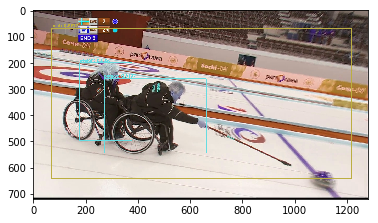

In [10]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
 
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)
# show the output image
plt.imshow(image)
cv2.waitKey(0)

In [9]:
data = pd.read_csv('../code/mpii_dataset.csv')
print(data.shape)

(17372, 37)


In [110]:
arr=[]
array = data.values
col = data.columns
for ix in range(0,data.shape[0]):
    ar = array[ix]
#     print(ar)
#     print(ar[1])
    if ar[1] == '050087661.jpg':
        arr.append(ar)
        print(ix)
        
        print('yeyeye')
#     if ix%1000==0:
#         print(ix)
        

4357
yeyeye


In [11]:
print(col)

Index([u'Unnamed: 0', u'NAME', u'r ankle_X', u'r ankle_Y', u'r knee_X',
       u'r knee_Y', u'r hip_X', u'r hip_Y', u'l hip_X', u'l hip_Y',
       u'l knee_X', u'l knee_Y', u'l ankle_X', u'l ankle_Y', u'pelvis_X',
       u'pelvis_Y', u'thorax_X', u'thorax_Y', u'upper neck_X', u'upper neck_Y',
       u'head top_X', u'head top_Y', u'r wrist_X', u'r wrist_Y', u'r elbow_X',
       u'r elbow_Y', u'r shoulder_X', u'r shoulder_Y', u'l shoulder_X',
       u'l shoulder_Y', u'l elbow_X', u'l elbow_Y', u'l wrist_X', u'l wrist_Y',
       u'Scale', u'Activity', u'Category'],
      dtype='object')


In [124]:
cut_data = pd.DataFrame(columns=data.columns)

In [164]:
for ix in range(0,data.shape[0]):
    temp_arr=[0]
    image_name = array[ix][1]
    temp_arr.append(image_name)
    image = cv2.imread('../MPII/'+image_name)
    (H, W) = image.shape[:2]
 
    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
 
    # construct a blob from the input image and then perform a forward
    # pass of the YOLO object detector, giving us our bounding boxes and
    # associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()
    boxes = []
    confidences = []
    classIDs = []
 
    # show timing information on YOLO
#     print("[INFO] YOLO took {:.6f} seconds".format(end - start))
    for output in layerOutputs:
    # loop over each of the detections
        for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
 
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
            if confidence > 0.5:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
 
                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
 
                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
    idxs = cv2.dnn.NMSBoxes(boxes, confidences,0.85,0.4)
    if len(idxs) > 0 and len(idxs)<=5:
    # loop over the indexes we are keeping
        for i in idxs.flatten():
            
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            x=boxes[i][0]
            y=boxes[i][1]
            w=boxes[i][2]
            h=boxes[i][3]
            if x<0:
                x=0
            if y<0:
                y=0
            if h<100 or w<100:
                continue
#         draw a bounding box rectangle and label on the image
            if classIDs[i]!=0:
                continue
            out=0
            for o in range(1,17):
                if array[ix][2*o]==-1:
                    continue
           
                x_c=int(array[ix][2*o])
                y_c=int(array[ix][(2*o)+1])
                
                if not (x_c>=x and x_c<=x+w):
#                     print('upar',array[ix][2*o],x_c,x,x+w)
                    out=out+1
                if not (y_c>=y and y_c<=y+h):
#                     print('niche',array[ix][(2*o)+1],y_c,y,y+h)
                    out=out+1
            if out>5:
#                 print(out)
                continue
                
            for ox in range(1,17):
                if array[ix][2*ox]<0:
                    temp_arr.append(-1)
                    temp_arr.append(-1)
                if array[ix][2*ox]>=0:
                    temp_arr.append(array[ix][2*ox]-x)
                    temp_arr.append(array[ix][(2*ox)+1]-y)
                
            temp_arr.append(array[ix][34])
            temp_arr.append(array[ix][35])
            temp_arr.append(array[ix][36])
#             print('hello')
#             color = [int(c) for c in COLORS[classIDs[i]]]
#             cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
#             text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])

#             print(ix,array[ix],temp_arr)
#             print(" ")
#             print("-----------")
            temp_data_f = pd.DataFrame([temp_arr[:37]],columns=data.columns)
    
            cut_data = pd.concat([cut_data,temp_data_f]) 
            
            if len(temp_arr)!=37:
                    print(ix,image_name,temp_arr)
                    continue
            crop_imgo = image[y:y+h, x:x+w]
#             print(crop_imgo.shape)
#             if(crop_imgo.shape[0]<10):
#                 print(y,y+h,x,x+w)
            cv2.imwrite('../newF/'+image_name,crop_imgo)
            if ix%500==0:
                print(ix)

        
cut_data.to_csv('cut.csv')

0
(106, '094290970.jpg', [0, '094290970.jpg', 11, 266, 49, 170, 109, 84, 178, 80, 224, 172, 272, 260, 144, 82, 123, -10, 120.52280000000002, -18.25740000000002, 98.47719999999998, -91.74259999999998, 61, 63, 40, 38, 74, -14, 172, -7, 165, 45, 119, 68, 2.3016237746425894, 'video exercise workouts, TV conditioning programs', 'conditioning exercise', 74, 308, 112, 212, 172, 126, 241, 122, 287, 214, 335, 302, 207, 124, 186, 32, 183.52280000000002, 23.74259999999998, 161.47719999999998, -49.74259999999998, 124, 105, 103, 80, 137, 28, 235, 35, 228, 87, 182, 110, 2.3016237746425894, 'video exercise workouts, TV conditioning programs', 'conditioning exercise'])
(393, '021296416.jpg', [0, '021296416.jpg', -1, -1, -1, -1, 657, 423, 801, 385, -1, -1, -1, -1, 729, 404, 689, 164, 695.0, 146.0, 745.0, 2.0, -1, -1, 598, 362, 601, 172, 776, 155, 823, 255, 866, 301, 4.593602507836307, 'elder care', 'home activities', -1, -1, -1, -1, 104, 389, 248, 351, -1, -1, -1, -1, 176, 370, 136, 130, 142.0, 112.0, 

2500
(2563, '006180846.jpg', [0, '006180846.jpg', 74, 403, 62, 313, 104, 228, 136, 224, 81, 320, 108, 401, 120, 226, 142, 132, 145.14390000000003, 118.7627, 157.85609999999997, 65.2373, 85, 177, 97, 175, 120, 131, 163, 132, 165, 207, 145, 247, 1.6504253997076024, 'frisbee', 'sports', 4, 340, -8, 250, 34, 165, 66, 161, 11, 257, 38, 338, 50, 163, 72, 69, 75.14390000000003, 55.762699999999995, 87.85609999999997, 2.2373000000000047, 15, 114, 27, 112, 50, 68, 93, 69, 95, 144, 75, 184, 1.6504253997076024, 'frisbee', 'sports'])
3000
(3313, '029765028.jpg', [0, '029765028.jpg', 61, 330, 42, 245, 66, 189, 93, 197, 88, 255, 83, 346, 80, 193, 100, 70, 99.0, 56.0, 95.0, -10.0, 35, 143, 61, 117, 80, 66, 119, 74, 122, 135, 106, 176, 1.9828706463105448, 'jai alai', 'sports', 135, 467, 116, 382, 140, 326, 167, 334, 162, 392, 157, 483, 154, 330, 174, 207, 173.0, 193.0, 169.0, 127.0, 109, 280, 135, 254, 154, 203, 193, 211, 196, 272, 180, 313, 1.9828706463105448, 'jai alai', 'sports'])
(3316, '016428684.

(6151, '000435958.jpg', [0, '000435958.jpg', -1, -1, -1, -1, 161, 546, 265, 542, -1, -1, -1, -1, 213, 544, 185, 316, 174.63850000000002, 258.8047, 145.36149999999998, 97.1953, -1, -1, 81, 546, 99, 338, 271, 294, 434, 286, 465, 112, 4.927194739402938, 'ethnic or cultural dancing (e.g., Greek, Middle Eastern, hula, salsa, merengue, bamba y plena, flame', 'dancing', -1, -1, -1, -1, 610, 557, 714, 553, -1, -1, -1, -1, 662, 555, 634, 327, 623.6385, 269.8047, 594.3615, 108.1953, -1, -1, 530, 557, 548, 349, 720, 305, 883, 297, 914, 123, 4.927194739402938, 'ethnic or cultural dancing (e.g., Greek, Middle Eastern, hula, salsa, merengue, bamba y plena, flame', 'dancing'])
(6162, '081043291.jpg', [0, '081043291.jpg', 392, 664, 390, 534, 375, 424, 428, 429, 440, 544, 424, 667, 402, 427, 385, 218, 382.30550000000005, 197.52139999999997, 367.69449999999995, 86.47859999999997, 298, 385, 313, 313, 330, 219, 440, 217, 481, 303, 525, 380, 3.36, 'ethnic or cultural dancing (e.g., Greek, Middle Eastern, h

(6851, '044501868.jpg', [0, '044501868.jpg', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 359, 209, 360.07410000000004, 216.77800000000002, 328.92589999999996, -8.77800000000002, 178, 490, 101, 373, 206, 185, 511, 232, 557, 416, 462, 487, 6.830899208742579, 'pushing a wheelchair, non-occupational', 'walking', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 162, 443, 163.07410000000004, 450.778, 131.92589999999996, 225.22199999999998, -19, 724, -96, 607, 9, 419, 314, 466, 360, 650, 265, 721, 6.830899208742579, 'pushing a wheelchair, non-occupational', 'walking'])
(6951, '075215489.jpg', [0, '075215489.jpg', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 241, -4.481499999999983, 202.341, -12.518500000000017, 145.659, -52, 194, -85, 264, -39, 248, 41, 233, 32, 236, 5, 179, 1.7174679036302252, 'bird watching, slow walk', 'walking', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 101, 98, 95.51850000000002, 59.34100000000001, 87.48149999999998, 2.65899

(9663, '085613022.jpg', [0, '085613022.jpg', 327, 356, 240, 219, 369, 94, 464, 105, 274, 257, -1, -1, 417, 100, 200, 76, 167.13, 79.35410000000002, 36.870000000000005, 92.64589999999998, 101, 348, 162, 251, 160, 90, 240, 61, 396, 105, 285, 181, 3.9280896120124353, 'standing, miscellaneous', 'miscellaneous', 346, 591, 259, 454, 388, 329, 483, 340, 293, 492, -1, -1, 436, 335, 219, 311, 186.13, 314.3541, 55.870000000000005, 327.6459, 120, 583, 181, 486, 179, 325, 259, 296, 415, 340, 304, 416, 3.9280896120124353, 'standing, miscellaneous', 'miscellaneous'])
(9817, '039127686.jpg', [0, '039127686.jpg', 142, 539, 78, 435, 71, 339, 147, 321, 270, 379, 221, 522, 109, 330, 101, 163, 107.0, 126.0, 134.0, -17.0, 137, 397, 19, 313, 20, 172, 181, 154, 198, 273, 225, 374, 4.3584951531463245, 'laughing, sitting', 'miscellaneous', 378, 574, 314, 470, 307, 374, 383, 356, 506, 414, 457, 557, 345, 365, 337, 198, 343.0, 161.0, 370.0, 18.0, 373, 432, 255, 348, 256, 207, 417, 189, 434, 308, 461, 409, 4.3584

13500
14000
(14149, '035406586.jpg', [0, '035406586.jpg', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 365, 324.1336, 276.0871, 303.8664, -31.087100000000007, 85, 903, 141, 689, 150, 397, 510, 332, 513, 624, 373, 320, 9.235261122458855, 'standing, talking in person', 'miscellaneous', -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 76, 398, 70.1336, 309.0871, 49.8664, 1.9128999999999934, -169, 936, -113, 722, -104, 430, 256, 365, 259, 657, 119, 353, 9.235261122458855, 'standing, talking in person', 'miscellaneous'])
(14215, '092001578.jpg', [0, '092001578.jpg', 120, 620, 111, 452, 77, 323, 22, 311, 59, 455, 53, 608, 50, 317, 101, 97, 98.9661000000001, 101.88130000000001, 143.0338999999999, -3.88130000000001, 264, 219, 206, 170, 154, 106, 47, 87, 31, 185, 114, 198, 3.4372826476738862, 'cutting and smoking fish, drying fish or meat', 'home activities', 1050, 742, 1041, 574, 1007, 445, 952, 433, 989, 577, 983, 730, 980, 439, 1031, 219, 1028.9661, 223.8813, 1073.0339

(16638, '062020483.jpg', [0, '062020483.jpg', -1, -1, 404, 617, 406, 419, 377, 396, 373, 586, -1, -1, 392, 408, 392, 190, 410.99620000000004, 161.00580000000002, 487.00379999999996, 44.994200000000006, 685, 251, 555, 289, 414, 198, 369, 181, 383, 278, 437, 347, 4.160799923091712, 'martial arts, different types', 'sports', -1, -1, 112, 611, 114, 413, 85, 390, 81, 580, -1, -1, 100, 402, 100, 184, 118.99620000000004, 155.00580000000002, 195.00379999999996, 38.994200000000006, 393, 245, 263, 283, 122, 192, 77, 175, 91, 272, 145, 341, 4.160799923091712, 'martial arts, different types', 'sports'])
(16804, '037780910.jpg', [0, '037780910.jpg', 875, 737, 832, 595, 817, 449, 885, 439, 892, 598, 962, 733, 851, 444, 845, 302, 849.0, 270.0, 867.0, 140.0, 769, 478, 752, 391, 762, 295, 928, 309, 955, 403, 1022, 485, 3.9618177646126034, 'basketball, game (Taylor Code 490)', 'sports', 143, 598, 100, 456, 85, 310, 153, 300, 160, 459, 230, 594, 119, 305, 113, 163, 117.0, 131.0, 135.0, 1.0, 37, 339, 20, 

In [165]:
cut_data.shape

(14959, 37)

In [111]:
ars = array[4357]
print(ars.shape)
data.columns

(37,)


Index([u'Unnamed: 0', u'NAME', u'r ankle_X', u'r ankle_Y', u'r knee_X',
       u'r knee_Y', u'r hip_X', u'r hip_Y', u'l hip_X', u'l hip_Y',
       u'l knee_X', u'l knee_Y', u'l ankle_X', u'l ankle_Y', u'pelvis_X',
       u'pelvis_Y', u'thorax_X', u'thorax_Y', u'upper neck_X', u'upper neck_Y',
       u'head top_X', u'head top_Y', u'r wrist_X', u'r wrist_Y', u'r elbow_X',
       u'r elbow_Y', u'r shoulder_X', u'r shoulder_Y', u'l shoulder_X',
       u'l shoulder_Y', u'l elbow_X', u'l elbow_Y', u'l wrist_X', u'l wrist_Y',
       u'Scale', u'Activity', u'Category'],
      dtype='object')

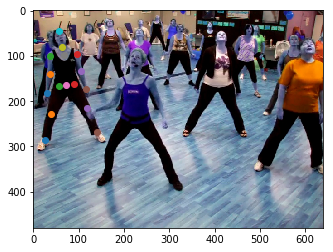

In [112]:
img =cv2.imread('../MPII/050087661.jpg')
plt.imshow(img)
i=1
while i<17:
    x_c=ars[2*i]
    y_c=ars[(2*i)+1]
    plt.scatter([x_c],[y_c])
    i=i+1

(286, 14)
[26 286 40 228 57 167 89 162 119 215 141 268 73 165 67 98 64.0 80.0 57.0
 45.0 30 182 37 139 37 100 96 96 105 133 116 172]


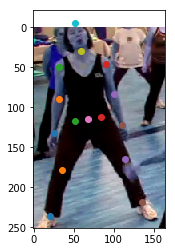

In [117]:
plt.imshow(crop_imgo)
i=1
print(x,y)
print(ars[2:-3])
while i<17:
    if ars[2*i]==-1:
        i=i+1
        continue
    x_c=int(ars[2*i])-x_vv
    y_c=int(ars[(2*i)+1])-y_vv
    plt.scatter([x_c],[y_c])
    i=i+1

In [44]:
type(x_val)

int

In [78]:
i=1
if not i==1:
    print('hello')

In [158]:
vals = cut_data.values
photo = vals[1]
pho = cv2.imread('../newF/'+photo[1])

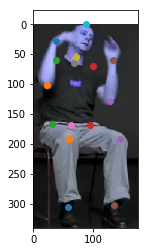

In [159]:
plt.imshow(pho)
i=1
while i<17:
    if photo[2*i]<0:
        i=i+1
        continue
    x= photo[2*i]
    y=photo[(2*i)+1]
    plt.scatter([x],[y])
    i=i+1